# Text Analytics course | 2020/21
# Final Project

### Authored by:
- Jose Gonzalez
- Alessandro Bonini
- Franchesco Santucciu 

# Libraries Imports

In [ ]:
# General purposes libs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import random
import re
import plotly.express as px
from PIL import Image
from collections import defaultdict, Counter
from tqdm.notebook import tqdm

In [ ]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint


# Sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import naive_bayes, svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Transformers
!pip install transformers
# import transformers
# lib for Machine learning models (BERT)
from transformers import BertTokenizer, TFBertForSequenceClassification, TFBertModel, TFRobertaForSequenceClassification, RobertaTokenizer
from transformers import TFDistilBertModel, DistilBertTokenizer, TFDistilBertForSequenceClassification, ElectraTokenizer, TFElectraForSequenceClassification

# NLTK
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import pos_tag
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Keras
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dropout
from keras.regularizers import l2
from keras.regularizers import l1
from keras.layers import Conv1D, Flatten, MaxPooling1D
from keras.layers import Bidirectional
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.utils import to_categorical

In [ ]:
#Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Gensim
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec, Word2Vec, FastText

# Others
import multiprocessing as mp
os.environ["WANDB_API_KEY"] = "0" ## to silence warning
import warnings
warnings.filterwarnings("ignore")
import string
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Prepare TPU environment

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU

print('Number of replicas:', strategy.num_replicas_in_sync)

2021-01-18 17:39:18,827 : WARNING : TPU system grpc://10.51.108.170:8470 has already been initialized. Reinitializing the TPU can cause previously created variables on TPU to be lost.


INFO:tensorflow:Initializing the TPU system: grpc://10.51.108.170:8470


2021-01-18 17:39:18,830 : INFO : Initializing the TPU system: grpc://10.51.108.170:8470


INFO:tensorflow:Clearing out eager caches


2021-01-18 17:39:50,284 : INFO : Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


2021-01-18 17:39:50,287 : INFO : Finished initializing TPU system.
2021-01-18 17:39:50,289 : WARNING : `tf.distribute.experimental.TPUStrategy` is deprecated, please use  the non experimental symbol `tf.distribute.TPUStrategy` instead.


INFO:tensorflow:Found TPU system:


2021-01-18 17:39:50,292 : INFO : Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


2021-01-18 17:39:50,294 : INFO : *** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


2021-01-18 17:39:50,295 : INFO : *** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


2021-01-18 17:39:50,297 : INFO : *** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


2021-01-18 17:39:50,298 : INFO : *** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


2021-01-18 17:39:50,299 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


2021-01-18 17:39:50,301 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


2021-01-18 17:39:50,302 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


2021-01-18 17:39:50,304 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


2021-01-18 17:39:50,305 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


2021-01-18 17:39:50,306 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


2021-01-18 17:39:50,307 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


2021-01-18 17:39:50,309 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


2021-01-18 17:39:50,310 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


2021-01-18 17:39:50,311 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


2021-01-18 17:39:50,313 : INFO : *** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU  grpc://10.51.108.170:8470
Number of replicas: 8


# Utilities

## Functions

### concatenate_sentences

In [ ]:
# this function take two columns of a dataframe and return a list of their concatenation
def concatenate_sentences(col_1, col_2):
  sentences= list()

  for i in range( 0, len(col_1) ):
    sentences.append( col_1[i] + " " + col_2[i] )

  return sentences

# example
#list_of_sentences= concatenate_sentences(df['premise'],df['hypothesis'])
#list_of_sentences

### prepare_input_we

In [ ]:
# this function take a list of sentences, then it return the right input for word embending model
def prepare_input_we(sentences):
  tok_sents= list()

  for sentence in sentences:
    tok_sents.append(word_tokenize(sentence))
  
  return tok_sents

# example
#tok_sents= prepare_input_we(list_of_sentences)

### prepare_input_w2d

In [ ]:
# this function takes a list of sentences and return the right input for doc2vec model
def prepare_input_w2d(list_of_sentences):
  return [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(list_of_sentences)]

### lemmatization

In [ ]:
# this function makes a lemmatization of the passed text, you can choose the pos
# here there is a list of the possible pos: http://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html
def lemmatization(texts, pos='a'):
  lamma_texts= list()
  lemmatizer = WordNetLemmatizer()

  for text in texts:
    toks= word_tokenize(text)
    toks= [lemmatizer.lemmatize(tok, pos= pos) for tok in toks]
    lamma_texts.append(' '.join(toks) )

  return lamma_texts

### stemmatization

In [ ]:
# this function makes a stemmatization of the passed text. You can choose
# between Porter and Lancaster stemmer
def stemmatization(texts, stemmer= 'porter'):

  stemmer= stemmer.lower()
  stemmed_texts= list()

  if (stemmer == 'porter'):
    porter= PorterStemmer()

    for text in texts:
      toks= word_tokenize(text)
      toks = [porter.stem(tok) for tok in toks]
      stemmed_texts.append( ' '.join(toks) )

  elif (stemmer == 'lancaster'):
    lancaster= LancasterStemmer()

    for text in texts:
      toks= word_tokenize(text)
      toks = [lancaster.stem(tok) for tok in toks]
      stemmed_texts.append( ' '.join(toks) )

  else:
    print('this stemmer is not allowed or it is not exist')
    return texts

  return stemmed_texts

### remove_punctuation

In [ ]:
def remove_punctuation(texts):
  # PUNCTUATION contains all the punctuantion characters, while cleaned_text
  # contains the text without punctuation
  PUNCTUACTION= string.punctuation
  cleaned_text= list()

  for text in texts:
    text= text.lower()
    
    tokens= word_tokenize(text)
    clean_tok= [word for word in tokens if word not in PUNCTUACTION]
    cleaned_text.append(' '.join(clean_tok) )
  
  return cleaned_text

### removing_stopwords

In [ ]:
def removing_stopwords(texts):
  stop_words= set( stopwords.words('english') )
  clean_texts= list()

  for text in texts:
    toks= word_tokenize(text)
    clean_toks= [tok for tok in toks if tok not in stop_words]
    clean_texts.append(' '.join(clean_toks))
  
  return clean_texts

### find_maxlen

In [ ]:
# Given a list of sequences, this function returns the length of the largest sequence
def find_maxlen(list_seq):
  maxlen= list()
  
  for seq in list_seq:
    maxlen.append(len(seq))

  return max(maxlen)

### find_maxfeatures

In [ ]:
def find_maxfeatures(input):
  max_features= list()
  for i in input:
    max_features.append(max(i))

  return max(max_features)

### plotting_learning_curves

In [ ]:
def plotting_learning_curves(history, loss= True, acc= False, 
                             save=False):
  if loss:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    if save:
      name= input(str('enter name for the plot: '))
      plt.savefig(fname= name)
      plt.show()
  if acc:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    if save:
      name= input(str('enter name for the plot: '))
      plt.savefig(fname= name)
      plt.show()

### preprocessing

In [ ]:
# with this function you can choose if you want to apply the removal of the stopwords
# or the punctuation, if you want to do a stemmatization (and choosing the stemmer you prefer)
# and a lemmatization (and if you want, you can specify the pos)
def preprocessing(texts, punctuation= True, stopwords= True, stem= False, lemma= False,
                  stemmer= 'porter', pos= 'a'):
  
  # removing the punctuation from the texts
  if punctuation:
    texts= remove_punctuation(texts)
  else:
    pass
  # removing all the stop-words from the texts
  if stopwords:
    texts= removing_stopwords(texts)
  else:
    pass
  # making a stemmatization of the words. You can choose the stemmer
  if stem:
    texts= stemmatization(texts, stemmer)
  else:
    pass
  # making a lemmatization of the words. You can choose the pos 
  if lemma:
    texts= lemmatization(texts, pos)
  else:
    pass


  return texts

# Obtain data

In [ ]:
train_df_orig = pd.read_csv('https://raw.githubusercontent.com/MateoGonzalez/text-analytics-project/main/train.csv')
test_df_orig = pd.read_csv('https://raw.githubusercontent.com/MateoGonzalez/text-analytics-project/main/test.csv')
#test_labels = pd.read_csv('https://raw.githubusercontent.com/MateoGonzalez/text-analytics-project/main/sample_submission.csv')

Let's join the labels set with the test set.

In [ ]:
# joining
#test_df_with_labels= test_df_orig.set_index('id').join(test_labels.set_index('id'))

In [ ]:
train_df_orig.head(3)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0


In [ ]:
#test_df_with_labels.head(3)

# Exploratory Data Analysis

## Data description and statistics

In [ ]:
print("train: ", train_df_orig.shape)
print("test: ", test_df_orig.shape)

train:  (12120, 6)
test:  (5195, 5)


In [ ]:
train_df_orig.columns

Index(['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'], dtype='object')

In [ ]:
train_df_orig.columns

Index(['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'], dtype='object')

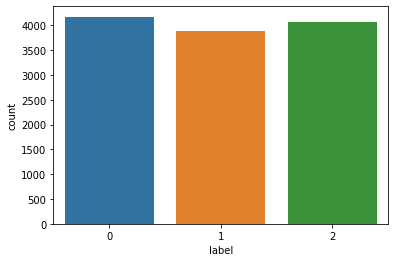

In [ ]:
sns.countplot(train_df_orig['label'])

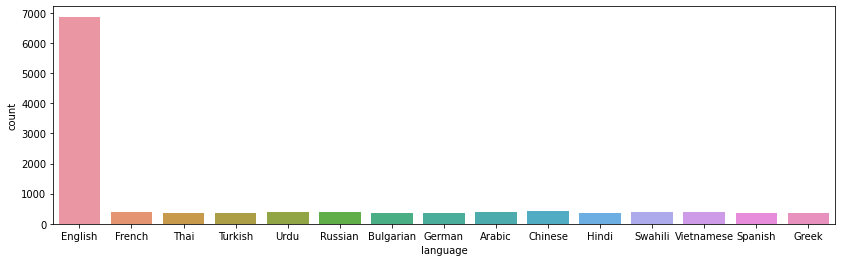

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(train_df_orig['language'])

## Assesing data quality

In [ ]:
## Is there any duplicated line?
train_df_orig[train_df_orig.duplicated()].count()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

In [ ]:
## Is there any missing values?
train_df_orig.isnull().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

## NLP Analysis

In [ ]:
train_joined = concatenate_sentences(
    train_df_orig[train_df_orig['language']=='English'].reset_index(drop=True).premise,
    train_df_orig[train_df_orig['language']=='English'].reset_index(drop=True).hypothesis
    )

In [ ]:
train_joined[:3]

['and these comments were considered in formulating the interim rules. The rules developed in the interim were put together with these comments in mind.',
 'These are issues that we wrestle with in practice groups of law firms, she said.  Practice groups are not permitted to work on these issues.',
 "you know they can't really defend themselves like somebody grown uh say my age you know yeah They can't defend themselves because of their age."]

In [ ]:
all_text = ""

for i in train_joined:
  for j in i:
    if j.isalpha() or j == " ":
      all_text += j.lower()
  all_text += " "

In [ ]:
tokens = word_tokenize(all_text)
len(tokens)

199063

In [ ]:
vocab = set(tokens)
len(vocab)

12699

In [ ]:
frequencies = list(Counter(tokens).items())
frequencies[:10]

[('and', 5090),
 ('these', 245),
 ('comments', 39),
 ('were', 642),
 ('considered', 46),
 ('in', 3370),
 ('formulating', 3),
 ('the', 12514),
 ('interim', 13),
 ('rules', 44)]

In [ ]:
frequencies.sort(key=lambda x: x[1], reverse=True)
frequencies[:10]

[('the', 12514),
 ('of', 5514),
 ('to', 5419),
 ('and', 5090),
 ('a', 4367),
 ('in', 3370),
 ('i', 2571),
 ('is', 2490),
 ('that', 2440),
 ('it', 2232)]

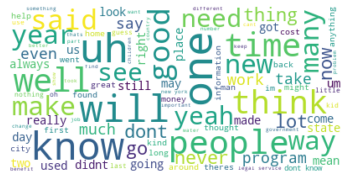

In [ ]:
stopwords = set(STOPWORDS)

text = all_text

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

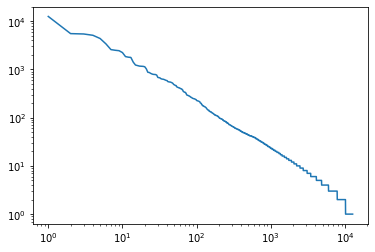

In [ ]:
plt.loglog([i+1 for i,_ in enumerate(frequencies)],[f for w,f in frequencies])
plt.show()

In [ ]:
all_p = ""

for i in train_df_orig[train_df_orig['language']=='English'].reset_index(drop=True).premise:
  for j in i:
    if j.isalpha() or j == " ":
      all_p += j.lower()
  all_p += " "

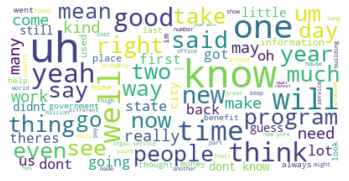

In [ ]:
stopwords = set(STOPWORDS)

text = all_p

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
all_p = ""

for i in train_df_orig[train_df_orig['language']=='English'].reset_index(drop=True).hypothesis:
  for j in i:
    if j.isalpha() or j == " ":
      all_p += j.lower()
  all_p += " "

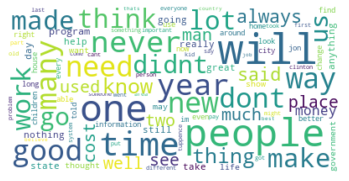

In [ ]:
stopwords = set(STOPWORDS)

text = all_p

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
stop_words = set(stopwords.words('english'))  
less_features = [w for w in tokens if w not in stop_words]
less_features[:10]

['comments',
 'considered',
 'formulating',
 'interim',
 'rules',
 'rules',
 'developed',
 'interim',
 'put',
 'together']

In [ ]:
frequencies_less = list(Counter(less_features).items())
frequencies_less.sort(key=lambda x: x[1], reverse=True)
frequencies_less[:10]

[('know', 631),
 ('uh', 622),
 ('one', 532),
 ('like', 473),
 ('would', 462),
 ('yeah', 424),
 ('dont', 417),
 ('well', 403),
 ('people', 379),
 ('think', 374)]

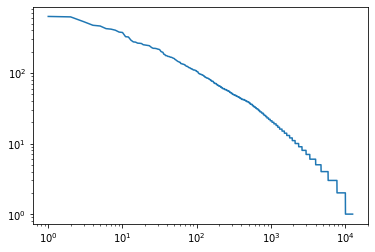

In [ ]:
plt.loglog([i+1 for i,_ in enumerate(frequencies_less)],[f for w,f in frequencies_less])
plt.show()

In [ ]:
bigram = list(nltk.bigrams(tokens))
freqdist = nltk.FreqDist(bigram)

In [ ]:
freqdist.most_common(30)

[(('of', 'the'), 1314),
 (('in', 'the'), 1006),
 (('to', 'the'), 560),
 (('on', 'the'), 399),
 (('you', 'know'), 398),
 (('to', 'be'), 373),
 (('and', 'the'), 367),
 (('for', 'the'), 310),
 (('at', 'the'), 309),
 (('it', 'was'), 292),
 (('it', 'is'), 275),
 (('is', 'a'), 274),
 (('from', 'the'), 251),
 (('is', 'the'), 212),
 (('by', 'the'), 211),
 (('a', 'lot'), 209),
 (('i', 'think'), 207),
 (('with', 'the'), 197),
 (('i', 'dont'), 193),
 (('that', 'the'), 190),
 (('there', 'is'), 185),
 (('in', 'a'), 185),
 (('there', 'are'), 180),
 (('of', 'a'), 176),
 (('lot', 'of'), 157),
 (('as', 'a'), 152),
 (('for', 'a'), 150),
 (('would', 'be'), 150),
 (('going', 'to'), 144),
 (('and', 'a'), 144)]

In [ ]:
bigram_less = list(nltk.bigrams(less_features))
freqdist_less = nltk.FreqDist(bigram_less)

In [ ]:
freqdist_less.most_common(30)

[(('dont', 'know'), 89),
 (('legal', 'services'), 82),
 (('new', 'york'), 72),
 (('postal', 'service'), 50),
 (('yeah', 'well'), 46),
 (('united', 'states'), 44),
 (('years', 'ago'), 43),
 (('dont', 'think'), 40),
 (('last', 'year'), 39),
 (('yeah', 'yeah'), 35),
 (('yeah', 'thats'), 35),
 (('well', 'thats'), 31),
 (('national', 'saving'), 31),
 (('uh', 'uh'), 29),
 (('york', 'times'), 28),
 (('uh', 'know'), 28),
 (('im', 'sure'), 26),
 (('legal', 'aid'), 25),
 (('know', 'like'), 24),
 (('th', 'century'), 24),
 (('ive', 'never'), 23),
 (('case', 'studies'), 23),
 (('two', 'weeks'), 23),
 (('white', 'house'), 22),
 (('youre', 'going'), 21),
 (('many', 'people'), 21),
 (('final', 'rule'), 21),
 (('long', 'time'), 20),
 (('dont', 'want'), 20),
 (('even', 'though'), 20)]

Topic Modeling

In [ ]:
tf_vectorizer = CountVectorizer(stop_words=set(stopwords.words("english")), max_df=0.5, min_df=5,max_features = 1000, ngram_range=(1,2))
tf = tf_vectorizer.fit_transform(train_joined)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 5

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda.fit(tf)


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=1)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f'Topic {topic_idx}: '
        message += ', '.join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
n_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic 0: city, one, many, place, small, around, also, old, found, number
Topic 1: legal, state, said, services, man, jon, program, life, tuppence, may
Topic 2: know, like, would, think, people, good, one, lot, get, could
Topic 3: uh, yeah, well, know, right, years, one, time, go, oh
Topic 4: information, government, federal, gao, clinton, use, new, national, house, two



Embeddings

In [ ]:
train_joined[:3]

['and these comments were considered in formulating the interim rules. The rules developed in the interim were put together with these comments in mind.',
 'These are issues that we wrestle with in practice groups of law firms, she said.  Practice groups are not permitted to work on these issues.',
 "you know they can't really defend themselves like somebody grown uh say my age you know yeah They can't defend themselves because of their age."]

In [ ]:
tok_sents = [word_tokenize(sentence.lower()) for sentence in train_joined]

In [ ]:
tok_sents[:2]

[['and',
  'these',
  'comments',
  'were',
  'considered',
  'in',
  'formulating',
  'the',
  'interim',
  'rules',
  '.',
  'the',
  'rules',
  'developed',
  'in',
  'the',
  'interim',
  'were',
  'put',
  'together',
  'with',
  'these',
  'comments',
  'in',
  'mind',
  '.'],
 ['these',
  'are',
  'issues',
  'that',
  'we',
  'wrestle',
  'with',
  'in',
  'practice',
  'groups',
  'of',
  'law',
  'firms',
  ',',
  'she',
  'said',
  '.',
  'practice',
  'groups',
  'are',
  'not',
  'permitted',
  'to',
  'work',
  'on',
  'these',
  'issues',
  '.']]

In [ ]:
w2v_model = Word2Vec(tok_sents, size=100, window=10, min_count=5, sg=1, iter=20, negative=10)

2021-01-18 17:40:13,878 : INFO : collecting all words and their counts
2021-01-18 17:40:13,879 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-01-18 17:40:13,936 : INFO : collected 12999 word types from a corpus of 226638 raw words and 6870 sentences
2021-01-18 17:40:13,937 : INFO : Loading a fresh vocabulary
2021-01-18 17:40:13,957 : INFO : effective_min_count=5 retains 4928 unique words (37% of original 12999, drops 8071)
2021-01-18 17:40:13,958 : INFO : effective_min_count=5 leaves 208836 word corpus (92% of original 226638, drops 17802)
2021-01-18 17:40:13,977 : INFO : deleting the raw counts dictionary of 12999 items
2021-01-18 17:40:13,979 : INFO : sample=0.001 downsamples 50 most-common words
2021-01-18 17:40:13,980 : INFO : downsampling leaves estimated 146669 word corpus (70.2% of prior 208836)
2021-01-18 17:40:14,001 : INFO : estimated required memory for 4928 words and 100 dimensions: 6406400 bytes
2021-01-18 17:40:14,002 : INFO : resetting la

In [ ]:
w2v_model.wv.most_similar(['like'])

2021-01-18 17:40:56,451 : INFO : precomputing L2-norms of word weight vectors


[('hate', 0.5449235439300537),
 ('jokes', 0.5422390699386597),
 ('eagles', 0.4864000380039215),
 ('pounds', 0.48631924390792847),
 ('philadelphia', 0.4825860559940338),
 ('nights', 0.47869735956192017),
 ('filters', 0.47455325722694397),
 ('cuba', 0.47282230854034424),
 ('apple', 0.4703976809978485),
 ('it', 0.4686051905155182)]

In [ ]:
w2v_model.wv.most_similar(['good','he'],['she'])

[('episodes', 0.5132555961608887),
 ('50', 0.423945814371109),
 ('thought', 0.41932886838912964),
 ('his', 0.4162711501121521),
 ('worst', 0.40478983521461487),
 ('without', 0.40105509757995605),
 ('wish', 0.39661669731140137),
 ('bruce', 0.3883912265300751),
 ('better', 0.3882230818271637),
 ('herb', 0.38085871934890747)]

In [ ]:
fast_model = FastText(tok_sents,size=100, window=10, min_count=5, sg=1, iter=20, negative=10)

2021-01-18 17:40:56,495 : INFO : collecting all words and their counts
2021-01-18 17:40:56,497 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-01-18 17:40:56,565 : INFO : collected 12999 word types from a corpus of 226638 raw words and 6870 sentences
2021-01-18 17:40:56,566 : INFO : Loading a fresh vocabulary
2021-01-18 17:40:56,587 : INFO : effective_min_count=5 retains 4928 unique words (37% of original 12999, drops 8071)
2021-01-18 17:40:56,588 : INFO : effective_min_count=5 leaves 208836 word corpus (92% of original 226638, drops 17802)
2021-01-18 17:40:56,608 : INFO : deleting the raw counts dictionary of 12999 items
2021-01-18 17:40:56,610 : INFO : sample=0.001 downsamples 50 most-common words
2021-01-18 17:40:56,611 : INFO : downsampling leaves estimated 146669 word corpus (70.2% of prior 208836)
2021-01-18 17:40:56,693 : INFO : estimated required memory for 4928 words, 39051 buckets and 100 dimensions: 23075360 bytes
2021-01-18 17:40:56,697 : INF

In [ ]:
fast_model.wv.most_similar(['yeah'])

2021-01-18 17:42:06,805 : INFO : precomputing L2-norms of word weight vectors
2021-01-18 17:42:06,811 : INFO : precomputing L2-norms of ngram weight vectors


[('um-hum', 0.6851451396942139),
 ('tigon', 0.639281153678894),
 ('ooh', 0.6363312602043152),
 ('uh-huh', 0.6354258060455322),
 ('huh-uh', 0.6249836683273315),
 ('yep', 0.6238753795623779),
 ('oh', 0.6112854480743408),
 ('ridiculous', 0.592332661151886),
 ('that', 0.5866780281066895),
 ('tournament', 0.584570050239563)]

In [ ]:
fast_model.wv.most_similar(['new'])

[('york', 0.7333173751831055),
 ('jets', 0.5149855613708496),
 ('newly', 0.5057945847511292),
 ('broncos', 0.5018181800842285),
 ('criticized', 0.4813224673271179),
 ('fashion', 0.4679172933101654),
 ('renewal', 0.45292210578918457),
 ('previously', 0.44594594836235046),
 ('drubbed', 0.44441378116607666),
 ('magazine', 0.44030699133872986)]

# Data preparation

## Data Filter 

We decided to work only with english sentences.

In [ ]:
train_df=train_df_orig[train_df_orig['lang_abv']=='en'].reset_index(drop=True)
test_df=test_df_orig[test_df_orig['lang_abv']=='en'].reset_index(drop=True)

In [ ]:
COLUMNS_TO_DROP= ['id', 'lang_abv', 'language']

for col in COLUMNS_TO_DROP:
  train_df.drop(columns= col, inplace= True)
  test_df.drop(columns= col, inplace= True)

## Clean Text

In [ ]:
def clean_word(value):
    word = value
    word = word.lower()
    word = re.sub(r'\?\?', 'e', word)
    word = re.sub('\.\.\.', '.', word)
    word = re.sub('\/', ' ', word)
    word = re.sub('--', ' ', word)
    word = re.sub('/\xad', '', word)
    word = word.strip(' ')
    return word

train_df['premise'] = train_df['premise'].apply(lambda v: clean_word(v))
train_df['hypothesis'] = train_df['hypothesis'].apply(lambda v: clean_word(v))
test_df['premise'] = test_df['premise'].apply(lambda v: clean_word(v))
test_df['hypothesis'] = test_df['hypothesis'].apply(lambda v: clean_word(v))

## Train/Validation splits and kFolds

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

# initialize kfold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1024)

# Extract labels for stratification
X, y = train_df[["premise", "hypothesis"]], train_df['label']

# Each fold is a tuple ([train_index_values], [val_index_values])
# fold_0, fold_1, fold_2, fold_3, fold_5 = kf.split(df, y)

# Put the folds into a list. This is a list of tuples.
fold_list = list(kf.split(X, y))

train_df_list = []
val_df_list = []

for i, fold in enumerate(fold_list):

    # map the train and val index values to dataframe rows
    df_train = train_df[train_df.index.isin(fold[0])]
    df_val = train_df[train_df.index.isin(fold[1])]
    
    train_df_list.append(df_train)
    val_df_list.append(df_val)
    
    

print(len(train_df_list))
print(len(val_df_list))

5
5


In [ ]:
# Take one fold as general Train / Validation split 
train_df = train_df_list[0]
val_df = val_df_list[0]

## Tokenization

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [ ]:
vect = CountVectorizer(min_df=5)  # tokenization and frequency count

train_df['raw_text']= train_df['premise'] + ' ' + train_df['hypothesis']
val_df['raw_text']= val_df['premise'] + ' ' + val_df['hypothesis']

print('fit')
vect.fit(train_df['raw_text'].to_list())
print('transform')
X_train_tok = vect.transform(train_df['raw_text'].to_list())
print('done')

X_test_tok =vect.transform(val_df['raw_text'].to_list())

fit
transform
done


In [ ]:
vect.get_feature_names()[-10:]

['yet',
 'york',
 'you',
 'young',
 'younger',
 'your',
 'yours',
 'yourself',
 'zen',
 'zero']

In [ ]:
for feat,freq in zip(vect.inverse_transform(X_train_tok[0,:])[0],X_train_tok[0,:].data):
  print(feat,freq)

and 1
comments 2
considered 1
developed 1
in 3
interim 2
mind 1
put 1
rules 2
the 3
these 2
together 1
were 2
with 1


## Feature selection

This is the first element where we use the labels, because it is a supervised method.

In [ ]:
sel = SelectKBest(chi2, k='all')  # feature selection
sel.fit(X_train_tok,train_df['label'].to_list())
X_train_sel = sel.transform(X_train_tok)
X_test_sel = sel.transform(X_test_tok)

In [ ]:
sel.get_support()

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
print(X_train_sel[0,:])

  (0, 185)	1
  (0, 605)	2
  (0, 661)	1
  (0, 827)	1
  (0, 1525)	3
  (0, 1579)	2
  (0, 1888)	1
  (0, 2335)	1
  (0, 2535)	2
  (0, 2951)	3
  (0, 2962)	2
  (0, 3005)	1
  (0, 3217)	2
  (0, 3255)	1


The feature selection module has an inverse transform method so that we can map selected feature back to the original large feature space

In [ ]:
print(vect.inverse_transform(sel.inverse_transform(X_train_sel[0,:])))

[array(['and', 'comments', 'considered', 'developed', 'in', 'interim',
       'mind', 'put', 'rules', 'the', 'these', 'together', 'were', 'with'],
      dtype='<U16')]


## Weighting

In [ ]:
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel)
X_train_vec = tfidf.transform(X_train_sel)
X_test_vec =tfidf.transform(X_test_sel)

In [ ]:
print(X_train_vec[0,:])

  (0, 3255)	0.09493007067856137
  (0, 3217)	0.23431415052433377
  (0, 3005)	0.19074596502868152
  (0, 2962)	0.28859917825742387
  (0, 2951)	0.13317161800158386
  (0, 2535)	0.4153587840840574
  (0, 2335)	0.17640209838736082
  (0, 1888)	0.21059656488477757
  (0, 1579)	0.5015373020431079
  (0, 1525)	0.20096418941485336
  (0, 827)	0.20374792921344798
  (0, 661)	0.1970896014555039
  (0, 605)	0.41820963469160977
  (0, 185)	0.05918057019297032


# Classic Machine Learning Classification

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
train_X = X_train_vec
test_X = X_test_vec
train_Y = train_df['label']
test_Y = val_df['label']

### Naive Bayes

In [ ]:
# fit the training dataset on the NB classifier
clf = naive_bayes.MultinomialNB()
clf.fit(train_X, train_Y)# predict the labels on validation dataset
y_pred = clf.predict(test_X)
print('Accuracy %s' % accuracy_score(test_Y, y_pred))
print('Precision %s' % precision_score(test_Y,y_pred, average='weighted'))
print('Recall %s' % recall_score(test_Y,y_pred,average='weighted'))
print('F1-score %s' % f1_score(test_Y, y_pred, average='macro'))
print(classification_report(test_Y, y_pred))
cm=confusion_matrix(test_Y, y_pred)

Accuracy 0.24963609898107714
Precision 0.24385661029385616
Recall 0.24963609898107714
F1-score 0.2413303209482914
              precision    recall  f1-score   support

           0       0.27      0.34      0.30       486
           1       0.20      0.15      0.17       433
           2       0.26      0.25      0.26       455

    accuracy                           0.25      1374
   macro avg       0.24      0.25      0.24      1374
weighted avg       0.24      0.25      0.24      1374



### SVM

In [ ]:
parameters = {'C': [0.01,0.1, 1, 10, 100, 1000]}

search = RandomizedSearchCV(svm.LinearSVC(), parameters,cv = 10, scoring = 'f1_weighted')
search.fit(train_X, train_Y)
report(search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.318 (std: 0.012)
Parameters: {'C': 0.01}

Model with rank: 2
Mean validation score: 0.306 (std: 0.016)
Parameters: {'C': 0.1}

Model with rank: 3
Mean validation score: 0.288 (std: 0.015)
Parameters: {'C': 1000}



In [ ]:
clf = search.best_estimator_
clf

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
# Classifier - Algorithm - linearSVM
# fit the training dataset on the classifier
clf.fit(train_X, train_Y)
y_pred = clf.predict(test_X)
print('Accuracy %s' % accuracy_score(test_Y, y_pred))
print('Precision %s' % precision_score(test_Y,y_pred, average='weighted'))
print('Recall %s' % recall_score(test_Y,y_pred,average='weighted'))
print('F1-score %s' % f1_score(test_Y, y_pred, average='macro'))
print(classification_report(test_Y, y_pred))
cm=confusion_matrix(test_Y, y_pred)
cm

Accuracy 0.34643377001455605
Precision 0.33882289551445555
Recall 0.34643377001455605
F1-score 0.2994739250014719
              precision    recall  f1-score   support

           0       0.35      0.67      0.46       486
           1       0.31      0.11      0.16       433
           2       0.36      0.23      0.28       455

    accuracy                           0.35      1374
   macro avg       0.34      0.34      0.30      1374
weighted avg       0.34      0.35      0.31      1374



array([[325,  60, 101],
       [302,  47,  84],
       [304,  47, 104]])

In [ ]:
parameters = {'C': [0.01,0.1, 1, 10, 100, 1000],'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale','auto']}

search = RandomizedSearchCV(svm.SVC(), parameters,cv = 10, scoring = 'f1_weighted')
search.fit(train_X, train_Y)
report(search.cv_results_, n_top=3)
clf = search.best_estimator_
clf

KeyboardInterrupt: ignored

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
clf.fit(train_X,train_Y)
y_pred = clf.predict(test_X)
print('Accuracy %s' % accuracy_score(test_Y, y_pred))
print('Precision %s' % precision_score(test_Y,y_pred, average='weighted'))
print('Recall %s' % recall_score(test_Y,y_pred,average='weighted'))
print('F1-score %s' % f1_score(test_Y, y_pred, average='macro'))
print(classification_report(test_Y, y_pred))
cm=confusion_matrix(test_Y, y_pred)
cm

### Decision Tree

In [ ]:
parameters = {'min_samples_leaf': np.arange(1, 10 + 1),'criterion':['gini','entropy'],'min_samples_split':np.arange(2,10)}

search = RandomizedSearchCV(DecisionTreeClassifier(), parameters,cv = 10, scoring = 'f1_weighted')
search.fit(train_X, train_Y)
report(search.cv_results_, n_top=3)
clf = search.best_estimator_
clf

In [ ]:
clf.fit(train_X,train_Y)
y_pred = clf.predict(test_X)
print('Accuracy %s' % accuracy_score(test_Y, y_pred))
print('Precision %s' % precision_score(test_Y,y_pred, average='weighted'))
print('Recall %s' % recall_score(test_Y,y_pred,average='weighted'))
print('F1-score %s' % f1_score(test_Y, y_pred, average='macro'))
print(classification_report(test_Y, y_pred))
cm=confusion_matrix(test_Y, y_pred)
cm

### KNN

In [ ]:
parameters = {'n_neighbors': np.arange(1, 10 + 1), 'weights':['uniform', 'distance']}

search = RandomizedSearchCV(KNeighborsClassifier(), parameters,cv = 10, scoring = 'f1_weighted')
search.fit(train_X, train_Y)
report(search.cv_results_, n_top=3)
clf = search.best_estimator_
clf

In [ ]:
clf.fit(train_X,train_Y)
y_pred = clf.predict(test_X)
print('Accuracy %s' % accuracy_score(test_Y, y_pred))
print('Precision %s' % precision_score(test_Y,y_pred, average='weighted'))
print('Recall %s' % recall_score(test_Y,y_pred,average='weighted'))
print('F1-score %s' % f1_score(test_Y, y_pred, average='macro'))
print(classification_report(test_Y, y_pred))
cm=confusion_matrix(test_Y, y_pred)
cm

### Logistic Regression

In [ ]:
parameters = {'C': [10**-2, 10**-1, 10**0,10**1, 10**2, 10**3]}

search = RandomizedSearchCV(LogisticRegression(), parameters,cv = 10, scoring = 'f1_weighted')
search.fit(train_X, train_Y)
report(search.cv_results_, n_top=3)
clf = search.best_estimator_
clf

In [ ]:
clf.fit(train_X,train_Y)
y_pred = clf.predict(test_X)
print('Accuracy %s' % accuracy_score(test_Y, y_pred))
print('Precision %s' % precision_score(test_Y,y_pred, average='weighted'))
print('Recall %s' % recall_score(test_Y,y_pred,average='weighted'))
print('F1-score %s' % f1_score(test_Y, y_pred, average='macro'))
print(classification_report(test_Y, y_pred))
cm=confusion_matrix(test_Y, y_pred)
cm

### Random Forest

In [ ]:
parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

search = RandomizedSearchCV(RandomForestClassifier(), parameters,cv = 10, scoring = 'f1_weighted')
search.fit(train_X, train_Y)
report(search.cv_results_, n_top=3)
clf = search.best_estimator_
clf

In [ ]:
clf.fit(train_X,train_Y)
y_pred = clf.predict(test_X)
print('Accuracy %s' % accuracy_score(test_Y, y_pred))
print('Precision %s' % precision_score(test_Y,y_pred, average='weighted'))
print('Recall %s' % recall_score(test_Y,y_pred,average='weighted'))
print('F1-score %s' % f1_score(test_Y, y_pred, average='macro'))
print(classification_report(test_Y, y_pred))
cm=confusion_matrix(test_Y, y_pred)
cm

# LSTM

## Process Data

In [ ]:
train_df['raw_text']= train_df['premise'] + ' ' + train_df['hypothesis']
val_df['raw_text']= val_df['premise'] + ' ' + val_df['hypothesis']


train_df['cleaned_text']= preprocessing(train_df['raw_text'], stopwords= True,
                                        punctuation= False, stem= False, lemma= True,
                                        stemmer= 'lancaster', pos= 'v')

val_df['cleaned_text']= preprocessing(val_df['raw_text'], stopwords= True,
                                       punctuation= False, stem= False, lemma= True,
                                       stemmer= 'lancaster', pos= 'v')

In [ ]:
X=list( train_df['cleaned_text'] )
y=train_df['label']

In [ ]:
print('Preparing the input for training...')

# get a list of sequences of integer instead of list of phrases
tokenizer=Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X)
X= tokenizer.texts_to_sequences(X)

# converting the X training attribute to the right format
X= np.array(X)
maxlen= find_maxlen(X)
X= sequence.pad_sequences(X, maxlen=maxlen)

# converting the y to the right format
y= pd.Series.to_numpy(y)
y = to_categorical(y)

print('done')

Preparing the input for training...
done


In [ ]:
X_test= list( val_df['cleaned_text'] )
y_test= val_df['label']

In [ ]:
print('preparing the input for test...')

tokenizer= Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_test)
X_test= tokenizer.texts_to_sequences(X_test)

 # converting the X test attribute to the right format
X_test= np.array(X_test)
maxlen= find_maxlen(X_test)
X_test= sequence.pad_sequences(X_test, maxlen=maxlen)

# converting the y to the right format
y_test= pd.Series.to_numpy(y_test)
y_test = to_categorical(y_test)

preparing the input for test...


## Build / Train / Evaluate

In [ ]:
max_features= find_maxfeatures(X) +1
embedding_dims = 15
hidden_dims = 25
batch_size = 128
epochs = 25
val_size= 0.25

In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, embedding_dims,
                    embeddings_regularizer=l2(0.05)
                    ))



model.add(Bidirectional(LSTM(units= 3,
               activity_regularizer=l2(0.03),
               recurrent_regularizer=l2(0.03),
               bias_regularizer=l2(0.03)
               )))



model.add(Dense(3, activation='softmax',
                activity_regularizer=l2(0.03),
                bias_regularizer=l2(0.03)
                ))


# try using different optimizers and different optimizer configs
opt= Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 15)          15000     
_________________________________________________________________
bidirectional (Bidirectional (None, 6)                 456       
_________________________________________________________________
dense (Dense)                (None, 3)                 21        
Total params: 15,477
Trainable params: 15,477
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Train...')
lstm= model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True,
          validation_split= 0.20)

Train...
Epoch 1/25
35/35 [==============================] - 6s 67ms/step - loss: 2.0607 - accuracy: 0.3366 - val_loss: 1.9684 - val_accuracy: 0.3491
Epoch 2/25
35/35 [==============================] - 1s 41ms/step - loss: 1.9414 - accuracy: 0.3438 - val_loss: 1.8647 - val_accuracy: 0.3536
Epoch 3/25
35/35 [==============================] - 1s 41ms/step - loss: 1.8425 - accuracy: 0.3483 - val_loss: 1.7793 - val_accuracy: 0.3555
Epoch 4/25
35/35 [==============================] - 1s 40ms/step - loss: 1.7608 - accuracy: 0.3468 - val_loss: 1.7089 - val_accuracy: 0.3555
Epoch 5/25
35/35 [==============================] - 1s 41ms/step - loss: 1.6938 - accuracy: 0.3556 - val_loss: 1.6509 - val_accuracy: 0.3555
Epoch 6/25
35/35 [==============================] - 1s 40ms/step - loss: 1.6387 - accuracy: 0.3542 - val_loss: 1.6032 - val_accuracy: 0.3555
Epoch 7/25
35/35 [==============================] - 1s 40ms/step - loss: 1.5937 - accuracy: 0.3470 - val_loss: 1.5640 - val_accuracy: 0.3555
Epoc

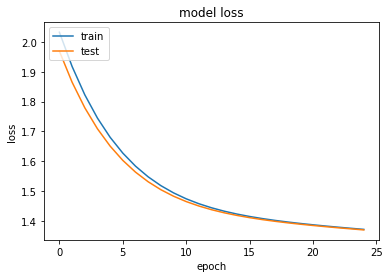

In [ ]:
plotting_learning_curves(lstm, acc= False, save= False)

In [ ]:
# getting the prediction of the model
y_pred= model.predict_classes(X_test)

# converting y_test to the right input for accuracy_score function
y_test= np.argmax(y_test, axis=1)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.3537117903930131


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[486   0   0]
 [433   0   0]
 [455   0   0]]


Refitting with all the data without validation

In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, embedding_dims,
                    embeddings_regularizer=l2(0.05)))


model.add(LSTM(units= 1, activity_regularizer=l2(0.03),
               recurrent_regularizer=l2(0.03),
               bias_regularizer=l2(0.03)
               ))


model.add(Dropout(0.2))


model.add(Dense(3, activation='softmax',
                activity_regularizer=l2(0.03),
                bias_regularizer=l2(0.03)
                ))


# try using different optimizers and different optimizer configs
opt= Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

model.summary()

print('Train...')
lstm= model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs)

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 15)          15000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 68        
_________________________________________________________________
dropout (Dropout)            (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6         
Total params: 15,074
Trainable params: 15,074
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/25
43/43 [==============================] - 3s 30ms/step - loss: 1.7608 - accuracy: 0.3220
Epoch 2/25
43/43 [==============================] - 1s 31ms/step - loss: 1.6228 - accuracy: 0.3517
Epoch 3/25
43/43 [========

Model evaluation

In [ ]:
# getting the prediction of the model
y_pred= model.predict_classes(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.3537117903930131


In [ ]:
print(confusion_matrix(y_test, y_pred))

# BERT Classification

## Variables and Process Analysis

In [ ]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)

2.4.0


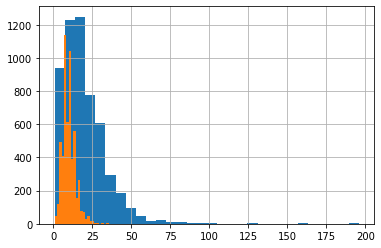

In [ ]:
## Number of words in each premise and hypothesis sentences

premise_len = [len(i.split()) for i in train_df['premise']]
hypothesis_len = [len(i.split()) for i in train_df['hypothesis']]

for i in [premise_len,hypothesis_len]:
  pd.Series(i).hist(bins=30)

In [ ]:
model_name = 'distilbert-base-uncased'


L_RATE = 1e-5
MAX_LEN = 55  ## We took into consideration mean sentence lenght from previous plot.
NUM_EPOCHS = 3
NUM_CORES = os.cpu_count()
batch_size = 8 * strategy.num_replicas_in_sync
# num_splits = 5
test_input = None

print(NUM_CORES)

# seed = 42
# tf.random.set_seed(seed)

2


## Model Definition

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained(model_name) # tokenizer init

def build_model():
    with strategy.scope():
        
        bert_encoder = TFDistilBertForSequenceClassification.from_pretrained(model_name)
  
        
        # define tensors for inputs
        input_word_ids = tf.keras.Input(shape=(None,), dtype=tf.int32, name="input_word_ids")
        input_mask = tf.keras.Input(shape=(None,), dtype=tf.int32, name="input_mask")
        
        # Define model for fine-tuning Bert
        
        ### Embedding layer extracted from pretrained BERT
        embedding = bert_encoder([input_word_ids, input_mask])[0]
        
        ### Layers for Classification task
        output_layer = tf.keras.layers.Dropout(0.2)(embedding)
        output_dense_layer = tf.keras.layers.Dense(64, activation='relu')(output_layer)
        output_dense_layer = tf.keras.layers.Dropout(0.1)(output_dense_layer)
        output_dense_layer = tf.keras.layers.Dense(32, activation='relu')(output_dense_layer)
        output = tf.keras.layers.Dense(3, activation='softmax')(output_dense_layer)

        # Define Training parameters
        ## Optimizer is ADAM
        ## Function Loss is CrossEntropy
        ## Metric for evaluation is a standard accuracy
        model = tf.keras.Model(inputs=[input_word_ids, input_mask], outputs=output)
        model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        return model

# Init DeepLearning Model 
with strategy.scope():
    model = build_model()
    model.summary() # this describe model architecture and layers

2021-01-18 16:01:54,046 : INFO : Lock 139962972615008 acquired on /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99.lock


2021-01-18 16:01:54,291 : INFO : Lock 139962972615008 released on /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99.lock
2021-01-18 16:01:54,446 : INFO : Lock 139962943722496 acquired on /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.d423bdf2f58dc8b77d5f5d18028d7ae4a72dcfd8f468e81fe979ada957a8c361.lock


2021-01-18 16:01:54,601 : INFO : Lock 139962943722496 released on /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.d423bdf2f58dc8b77d5f5d18028d7ae4a72dcfd8f468e81fe979ada957a8c361.lock
2021-01-18 16:01:54,710 : INFO : Lock 139962943724512 acquired on /root/.cache/huggingface/transformers/fa107dc22c014df078a1b75235144a927f7e9764916222711f239b7ee6092ec9.bc4b731be56d8422e12b1d5bfa86fbd81d18d2770da1f5ac4f33640a17b7dde9.h5.lock


2021-01-18 16:02:00,511 : INFO : Lock 139962943724512 released on /root/.cache/huggingface/transformers/fa107dc22c014df078a1b75235144a927f7e9764916222711f239b7ee6092ec9.bc4b731be56d8422e12b1d5bfa86fbd81d18d2770da1f5ac4f33640a17b7dde9.h5.lock


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_layer_norm', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_19', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f4c4938bd90> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).2021-01-18 16:02:28,498 : WARNING : AutoGraph could not transform <bound method Socket.send of <zmq.sugar.socket.Socket object at 0x7f4c2b9d95f8>> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f4c4938bd90> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f4c4938bd90> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
2021-01-18 16:02:28,783 : WARNING : AutoGraph could not transform <function wrap at 0x7f4c46d188c8> and will run it as-is.
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
tf_distil_bert_for_sequence_cla TFSequenceClassifier 66955010    input_word_ids[0][0]             
                                                                 input_mask[0][0]                 
_____________________________________________________

## Tokens and Tensors

In [ ]:
auto = tf.data.experimental.AUTOTUNE

def make_dataset(train_input, train_label):
    dataset = tf.data.Dataset.from_tensor_slices(
        (
            train_input,
            train_label
        )
    ).repeat().shuffle(batch_size).batch(batch_size).prefetch(auto)
    return dataset


def bert_encode(hypotheses, premises, augmentation=False):
    num_examples = len(hypotheses)

    # sentence_1 = [tokenizer.encode(s) for s in premises]
    # sentence_2 = [tokenizer.encode(s) for s in hypotheses]
    input_word_ids = [tokenizer.encode(s1,s2) for s1,s2 in zip(premises,hypotheses)  ]
    # input_word_ids = list(map(lambda x: x[0]+x[1], list(zip(sentence_1,sentence_2))))
    input_mask = [np.ones_like(x) for x in input_word_ids]
    inputs = {
        'input_word_ids': tf.keras.preprocessing.sequence.pad_sequences(input_word_ids, padding='post', maxlen=MAX_LEN, truncating='post'),
        'input_mask': tf.keras.preprocessing.sequence.pad_sequences(input_mask, padding='post', maxlen=MAX_LEN, truncating='post')
    }
    return inputs

In [ ]:
df_train['prediction'] = 0
num_augmentation = 1

# encoding training data
train_input = bert_encode(train_df.hypothesis.values,train_df.premise.values, augmentation=False)
train_label = train_df.label.values

# create data Iterator for training 
train_sequence = make_dataset(train_input, train_label)

# encoding validation data
validation_input = bert_encode(val_df.hypothesis.values, val_df.premise.values, augmentation=False)
validation_label = val_df.label.values
tf.keras.backend.clear_session()

In [ ]:
train_input['input_word_ids'][1]

array([  101,  2122,  2024,  3314,  2008,  2057, 25579,  2007,  1999,
        3218,  2967,  1997,  2375,  9786,  1010,  2016,  2056,  1012,
         102,  3218,  2967,  2024,  2025,  7936,  2000,  2147,  2006,
        2122,  3314,  1012,   102,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

## Training the Model

In [ ]:
n_steps = (len(train_label)) // batch_size

with strategy.scope():
    history = model.fit(
        train_sequence, shuffle=True, steps_per_epoch=n_steps, 
        validation_data = (validation_input, validation_label), epochs=50, verbose=1,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5),
            tf.keras.callbacks.ModelCheckpoint(
                'model.h5', monitor='val_accuracy', save_best_only=True,save_weights_only=True)
        ]
    ) 

# save trained model
model.load_weights('model.h5')

Epoch 1/50
85/85 [==============================] - 5s 63ms/step - loss: 0.5240 - accuracy: 0.7664 - val_loss: 1.2231 - val_accuracy: 0.5932
Epoch 2/50
85/85 [==============================] - 5s 61ms/step - loss: 0.5365 - accuracy: 0.7566 - val_loss: 1.2225 - val_accuracy: 0.5932
Epoch 3/50
85/85 [==============================] - 5s 61ms/step - loss: 0.5114 - accuracy: 0.7673 - val_loss: 1.2243 - val_accuracy: 0.5924
Epoch 4/50
85/85 [==============================] - 5s 61ms/step - loss: 0.5273 - accuracy: 0.7557 - val_loss: 1.2228 - val_accuracy: 0.5888
Epoch 5/50
85/85 [==============================] - 5s 62ms/step - loss: 0.5094 - accuracy: 0.7676 - val_loss: 1.2238 - val_accuracy: 0.5902
Epoch 6/50
85/85 [==============================] - 5s 61ms/step - loss: 0.5150 - accuracy: 0.7724 - val_loss: 1.2225 - val_accuracy: 0.5859
Epoch 7/50
85/85 [==============================] - 5s 61ms/step - loss: 0.5204 - accuracy: 0.7713 - val_loss: 1.2222 - val_accuracy: 0.5881
Epoch 8/50
85

In [ ]:
# calcul of validation Accuracy
validation_predictions = model.predict(validation_input)
validation_predictions = np.argmax(validation_predictions, axis=-1)
val_df['predictions'] = validation_predictions
acc = accuracy_score(validation_label, validation_predictions)
print('Accuracy: {}'.format(acc))

Accuracy: 0.5931586608442504


## Model Evaluation

In [ ]:
losses = pd.DataFrame(model.history.history)
#losses[['loss','val_loss']].plot()
losses.head()

""


In [ ]:
print(classification_report(validation_label, validation_predictions))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       486
           1       0.55      0.60      0.58       433
           2       0.64      0.55      0.59       455

    accuracy                           0.60      1374
   macro avg       0.60      0.60      0.60      1374
weighted avg       0.60      0.60      0.60      1374



In [ ]:
confusion_matrix(validation_label, validation_predictions)

array([[313, 101,  72],
       [102, 259,  72],
       [ 97, 107, 251]])